In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd


In [2]:

# URL of the page to scrape
url = "https://22f3001919.github.io/tds_project_1/index-Im7NU3CH.html"

# Fetch the webpage content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

response.text

'\n<link rel=stylesheet href=style.css>\n<div id=output></div>\n<script type="module">\nimport { renderData } from "./render.js";\nconst data = [{"YEAR":1980,"ST_NAME":"GUJARAT","link":"PvDzDRtO"},{"YEAR":1985,"ST_NAME":"GUJARAT","link":"dsUdMbD3"},{"YEAR":1990,"ST_NAME":"GUJARAT","link":"aGe1QUPa"},{"YEAR":1995,"ST_NAME":"GUJARAT","link":"cM92RToU"},{"YEAR":1998,"ST_NAME":"GUJARAT","link":"rgCukA3A"},{"YEAR":2002,"ST_NAME":"GUJARAT","link":"BRGi4BWy"},{"YEAR":2007,"ST_NAME":"GUJARAT","link":"Yynm6Kdy"},{"YEAR":2017,"ST_NAME":"GUJARAT","link":"ofldNkLL"},{"YEAR":2022,"ST_NAME":"GUJARAT","link":"RFr2vCNF"},{"YEAR":1967,"ST_NAME":"HARYANA","link":"7755KERn"},{"YEAR":1968,"ST_NAME":"HARYANA","link":"qckaOiWQ"},{"YEAR":1972,"ST_NAME":"HARYANA","link":"8y5Cvg2X"},{"YEAR":1977,"ST_NAME":"HARYANA","link":"uCubcwmG"},{"YEAR":1982,"ST_NAME":"HARYANA","link":"lmPTt1pv"},{"YEAR":1987,"ST_NAME":"HARYANA","link":"Sc5eCScY"},{"YEAR":1991,"ST_NAME":"HARYANA","link":"8ChfgVz4"},{"YEAR":1996,"ST_NAME":

In [3]:
# Extract the script tag that contains the data
script_tag = soup.find("script", {"type": "module"})
script_tag

<script type="module">
import { renderData } from "./render.js";
const data = [{"YEAR":1980,"ST_NAME":"GUJARAT","link":"PvDzDRtO"},{"YEAR":1985,"ST_NAME":"GUJARAT","link":"dsUdMbD3"},{"YEAR":1990,"ST_NAME":"GUJARAT","link":"aGe1QUPa"},{"YEAR":1995,"ST_NAME":"GUJARAT","link":"cM92RToU"},{"YEAR":1998,"ST_NAME":"GUJARAT","link":"rgCukA3A"},{"YEAR":2002,"ST_NAME":"GUJARAT","link":"BRGi4BWy"},{"YEAR":2007,"ST_NAME":"GUJARAT","link":"Yynm6Kdy"},{"YEAR":2017,"ST_NAME":"GUJARAT","link":"ofldNkLL"},{"YEAR":2022,"ST_NAME":"GUJARAT","link":"RFr2vCNF"},{"YEAR":1967,"ST_NAME":"HARYANA","link":"7755KERn"},{"YEAR":1968,"ST_NAME":"HARYANA","link":"qckaOiWQ"},{"YEAR":1972,"ST_NAME":"HARYANA","link":"8y5Cvg2X"},{"YEAR":1977,"ST_NAME":"HARYANA","link":"uCubcwmG"},{"YEAR":1982,"ST_NAME":"HARYANA","link":"lmPTt1pv"},{"YEAR":1987,"ST_NAME":"HARYANA","link":"Sc5eCScY"},{"YEAR":1991,"ST_NAME":"HARYANA","link":"8ChfgVz4"},{"YEAR":1996,"ST_NAME":"HARYANA","link":"BeAUZclE"},{"YEAR":2000,"ST_NAME":"HARYANA","lin

In [4]:
script_content = script_tag.string
script_content

'\nimport { renderData } from "./render.js";\nconst data = [{"YEAR":1980,"ST_NAME":"GUJARAT","link":"PvDzDRtO"},{"YEAR":1985,"ST_NAME":"GUJARAT","link":"dsUdMbD3"},{"YEAR":1990,"ST_NAME":"GUJARAT","link":"aGe1QUPa"},{"YEAR":1995,"ST_NAME":"GUJARAT","link":"cM92RToU"},{"YEAR":1998,"ST_NAME":"GUJARAT","link":"rgCukA3A"},{"YEAR":2002,"ST_NAME":"GUJARAT","link":"BRGi4BWy"},{"YEAR":2007,"ST_NAME":"GUJARAT","link":"Yynm6Kdy"},{"YEAR":2017,"ST_NAME":"GUJARAT","link":"ofldNkLL"},{"YEAR":2022,"ST_NAME":"GUJARAT","link":"RFr2vCNF"},{"YEAR":1967,"ST_NAME":"HARYANA","link":"7755KERn"},{"YEAR":1968,"ST_NAME":"HARYANA","link":"qckaOiWQ"},{"YEAR":1972,"ST_NAME":"HARYANA","link":"8y5Cvg2X"},{"YEAR":1977,"ST_NAME":"HARYANA","link":"uCubcwmG"},{"YEAR":1982,"ST_NAME":"HARYANA","link":"lmPTt1pv"},{"YEAR":1987,"ST_NAME":"HARYANA","link":"Sc5eCScY"},{"YEAR":1991,"ST_NAME":"HARYANA","link":"8ChfgVz4"},{"YEAR":1996,"ST_NAME":"HARYANA","link":"BeAUZclE"},{"YEAR":2000,"ST_NAME":"HARYANA","link":"h25tAIrH"},{"YE

In [5]:
# Find the JSON part in the script
start_index = script_content.find('const data = ') + len('const data = ')
start_index

56

In [6]:
end_index = script_content.find(';', start_index)
end_index

2303

In [7]:
json_data = script_content[start_index:end_index].strip()
print(json_data)

[{"YEAR":1980,"ST_NAME":"GUJARAT","link":"PvDzDRtO"},{"YEAR":1985,"ST_NAME":"GUJARAT","link":"dsUdMbD3"},{"YEAR":1990,"ST_NAME":"GUJARAT","link":"aGe1QUPa"},{"YEAR":1995,"ST_NAME":"GUJARAT","link":"cM92RToU"},{"YEAR":1998,"ST_NAME":"GUJARAT","link":"rgCukA3A"},{"YEAR":2002,"ST_NAME":"GUJARAT","link":"BRGi4BWy"},{"YEAR":2007,"ST_NAME":"GUJARAT","link":"Yynm6Kdy"},{"YEAR":2017,"ST_NAME":"GUJARAT","link":"ofldNkLL"},{"YEAR":2022,"ST_NAME":"GUJARAT","link":"RFr2vCNF"},{"YEAR":1967,"ST_NAME":"HARYANA","link":"7755KERn"},{"YEAR":1968,"ST_NAME":"HARYANA","link":"qckaOiWQ"},{"YEAR":1972,"ST_NAME":"HARYANA","link":"8y5Cvg2X"},{"YEAR":1977,"ST_NAME":"HARYANA","link":"uCubcwmG"},{"YEAR":1982,"ST_NAME":"HARYANA","link":"lmPTt1pv"},{"YEAR":1987,"ST_NAME":"HARYANA","link":"Sc5eCScY"},{"YEAR":1991,"ST_NAME":"HARYANA","link":"8ChfgVz4"},{"YEAR":1996,"ST_NAME":"HARYANA","link":"BeAUZclE"},{"YEAR":2000,"ST_NAME":"HARYANA","link":"h25tAIrH"},{"YEAR":2005,"ST_NAME":"HARYANA","link":"msBLHqoh"},{"YEAR":200

In [8]:
# Parse the JSON data
data = json.loads(json_data)
data

[{'YEAR': 1980, 'ST_NAME': 'GUJARAT', 'link': 'PvDzDRtO'},
 {'YEAR': 1985, 'ST_NAME': 'GUJARAT', 'link': 'dsUdMbD3'},
 {'YEAR': 1990, 'ST_NAME': 'GUJARAT', 'link': 'aGe1QUPa'},
 {'YEAR': 1995, 'ST_NAME': 'GUJARAT', 'link': 'cM92RToU'},
 {'YEAR': 1998, 'ST_NAME': 'GUJARAT', 'link': 'rgCukA3A'},
 {'YEAR': 2002, 'ST_NAME': 'GUJARAT', 'link': 'BRGi4BWy'},
 {'YEAR': 2007, 'ST_NAME': 'GUJARAT', 'link': 'Yynm6Kdy'},
 {'YEAR': 2017, 'ST_NAME': 'GUJARAT', 'link': 'ofldNkLL'},
 {'YEAR': 2022, 'ST_NAME': 'GUJARAT', 'link': 'RFr2vCNF'},
 {'YEAR': 1967, 'ST_NAME': 'HARYANA', 'link': '7755KERn'},
 {'YEAR': 1968, 'ST_NAME': 'HARYANA', 'link': 'qckaOiWQ'},
 {'YEAR': 1972, 'ST_NAME': 'HARYANA', 'link': '8y5Cvg2X'},
 {'YEAR': 1977, 'ST_NAME': 'HARYANA', 'link': 'uCubcwmG'},
 {'YEAR': 1982, 'ST_NAME': 'HARYANA', 'link': 'lmPTt1pv'},
 {'YEAR': 1987, 'ST_NAME': 'HARYANA', 'link': 'Sc5eCScY'},
 {'YEAR': 1991, 'ST_NAME': 'HARYANA', 'link': '8ChfgVz4'},
 {'YEAR': 1996, 'ST_NAME': 'HARYANA', 'link': 'BeAUZclE'

In [9]:
# Convert to DataFrame
df = pd.DataFrame(data)
# Filter for Haryana
df_haryana = df[df['ST_NAME'] == 'HARYANA']
df_haryana

,YEAR,ST_NAME,link
9,1967,HARYANA,7755KERn
10,1968,HARYANA,qckaOiWQ
11,1972,HARYANA,8y5Cvg2X
12,1977,HARYANA,uCubcwmG
13,1982,HARYANA,lmPTt1pv
14,1987,HARYANA,Sc5eCScY
15,1991,HARYANA,8ChfgVz4
16,1996,HARYANA,BeAUZclE
17,2000,HARYANA,h25tAIrH
18,2005,HARYANA,msBLHqoh


In [10]:
df_haryana.loc[:, 'full_link'] = "https://22f3001919.github.io/tds_project_1/" + df_haryana['link'] + ".html"
pd.set_option('display.max_colwidth', None)
df_haryana

C:\Users\Asus\AppData\Local\Temp\ipykernel_11452\2556714267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_haryana.loc[:, 'full_link'] = "https://22f3001919.github.io/tds_project_1/" + df_haryana['link'] + ".html"


,YEAR,ST_NAME,link,full_link
9,1967,HARYANA,7755KERn,https://22f3001919.github.io/tds_project_1/7755KERn.html
10,1968,HARYANA,qckaOiWQ,https://22f3001919.github.io/tds_project_1/qckaOiWQ.html
11,1972,HARYANA,8y5Cvg2X,https://22f3001919.github.io/tds_project_1/8y5Cvg2X.html
12,1977,HARYANA,uCubcwmG,https://22f3001919.github.io/tds_project_1/uCubcwmG.html
13,1982,HARYANA,lmPTt1pv,https://22f3001919.github.io/tds_project_1/lmPTt1pv.html
14,1987,HARYANA,Sc5eCScY,https://22f3001919.github.io/tds_project_1/Sc5eCScY.html
15,1991,HARYANA,8ChfgVz4,https://22f3001919.github.io/tds_project_1/8ChfgVz4.html
16,1996,HARYANA,BeAUZclE,https://22f3001919.github.io/tds_project_1/BeAUZclE.html
17,2000,HARYANA,h25tAIrH,https://22f3001919.github.io/tds_project_1/h25tAIrH.html
18,2005,HARYANA,msBLHqoh,https://22f3001919.github.io/tds_project_1/msBLHqoh.html


In [11]:
# Function to parse each link
def parse_link(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, "html.parser")
    # Extract the script tag that contains the data
    script_tag = soup.find("script", {"type": "module"})
    script_content = script_tag.string
    start_index = script_content.find('const data = ') + len('const data = ')
    end_index = script_content.find(';', start_index)
    json_data = script_content[start_index:end_index].strip()
    data = json.loads(json_data)
    return data

In [12]:
# Initialize an empty list to store DataFrames
dfs = []

# Iterate through each URL in df_haryana['full_link']
for idx, url in enumerate(df_haryana['full_link']):
    print(f"Processing URL {idx + 1}: {url}")
    data = parse_link(url)
    # Assuming your data is a list of dictionaries, create a DataFrame
    df = pd.DataFrame(data)
    dfs.append(df)


Processing URL 1: https://22f3001919.github.io/tds_project_1/7755KERn.html
Processing URL 2: https://22f3001919.github.io/tds_project_1/qckaOiWQ.html
Processing URL 3: https://22f3001919.github.io/tds_project_1/8y5Cvg2X.html
Processing URL 4: https://22f3001919.github.io/tds_project_1/uCubcwmG.html
Processing URL 5: https://22f3001919.github.io/tds_project_1/lmPTt1pv.html
Processing URL 6: https://22f3001919.github.io/tds_project_1/Sc5eCScY.html
Processing URL 7: https://22f3001919.github.io/tds_project_1/8ChfgVz4.html
Processing URL 8: https://22f3001919.github.io/tds_project_1/BeAUZclE.html
Processing URL 9: https://22f3001919.github.io/tds_project_1/h25tAIrH.html
Processing URL 10: https://22f3001919.github.io/tds_project_1/msBLHqoh.html
Processing URL 11: https://22f3001919.github.io/tds_project_1/WgTprTOT.html
Processing URL 12: https://22f3001919.github.io/tds_project_1/F1hOhTwP.html


In [13]:
print(df_haryana['full_link'].head())  # Print first few entries

9     https://22f3001919.github.io/tds_project_1/7755KERn.html
10    https://22f3001919.github.io/tds_project_1/qckaOiWQ.html
11    https://22f3001919.github.io/tds_project_1/8y5Cvg2X.html
12    https://22f3001919.github.io/tds_project_1/uCubcwmG.html
13    https://22f3001919.github.io/tds_project_1/lmPTt1pv.html
Name: full_link, dtype: object


In [14]:
dfs[2]

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES
0,117782,HARYANA,1972,1 KALKA,1 KISHORI LAL,M,None,None,INC,22173.0
1,117783,HARYANA,1972,1 KALKA,2 LACHMAN SINGH,M,None,None,IND,20565.0
2,117784,HARYANA,1972,1 KALKA,3 JUMMA RAM,M,None,None,IND,968.0
3,117785,HARYANA,1972,1 KALKA,4 SHAKTI PRASAD,M,None,None,IND,686.0
4,117786,HARYANA,1972,2 NARAINGARH,1 JAGJIT SINGH,M,None,None,INC,21818.0
...,...,...,...,...,...,...,...,...,...,...
384,118166,HARYANA,1972,81 ELLENABAD,1 BRIJ LAL,M,None,None,INC,27266.0
385,118167,HARYANA,1972,81 ELLENABAD,2 BIRBAL,M,None,None,IND,15160.0
386,118168,HARYANA,1972,81 ELLENABAD,3 JASWANT SINGH,M,None,None,CPI,4939.0
387,118169,HARYANA,1972,81 ELLENABAD,4 BRIJ LAL,M,None,None,IND,900.0


In [15]:
# Initialize an empty list to store filtered DataFrames
filtered_dfs = []

# Iterate through each DataFrame in dfs
for df in dfs:
    # Filter rows where AC contains 'KARNAL'
    filtered_df = df[df['AC'].str.contains('KARNAL', case=False, na=False)]
    filtered_dfs.append(filtered_df)


In [16]:
combined_df = pd.concat(filtered_dfs, ignore_index=True)
combined_df.head()

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES
0,116978,HARYANA,1967,15 KARNAL,1 R. LAL,M,None,None,BJS,11702.0
1,116979,HARYANA,1967,15 KARNAL,2 L. RAM,M,None,None,INC,9215.0
2,116980,HARYANA,1967,15 KARNAL,3 R. PIARA,M,None,None,IND,9080.0
3,116981,HARYANA,1967,15 KARNAL,4 S. PRASAD,M,None,None,IND,5176.0
4,116982,HARYANA,1967,15 KARNAL,5 P. LAL,M,None,None,IND,1924.0


10. For the  given AC_NAME, What is the latest year in which the winner won more than 50 percent of the vote? [string]
- If no one got more than 50 percent of the vote, then the answer is NA

ANS) 2019

In [17]:
df=combined_df.copy()
# Group by YEAR and AC, and calculate the total votes in each group
df['TOTAL_VOTES'] = df.groupby(['YEAR', 'AC'])['VOTES'].transform('sum')

# Calculate the percentage of votes for each candidate
df['VOTE_PERCENTAGE'] = (df['VOTES'] / df['TOTAL_VOTES']) * 100

# Display the DataFrame
greater_than_50=df[df['VOTE_PERCENTAGE']>50]
greater_than_50

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES,TOTAL_VOTES,VOTE_PERCENTAGE
18,118236,HARYANA,1977,13 KARNAL,1 RAM LAL,M,None,None,JNP,25236.0,38497.0,65.553160
23,118988,HARYANA,1982,13 KARNAL,1 SHANTI DEVI,F,None,None,INC,30267.0,53457.0,56.619339
37,120113,HARYANA,1987,13 KARNAL,1 LACHHMAN DASS,M,None,None,BJP,32156.0,61205.0,52.538191
54,121485,HARYANA,1991,13 KARNAL,1 JAI PARKASH,M,None,None,INC,36485.0,70660.0,51.634588
129,126894,HARYANA,2005,13 KARNAL,1 SUMITA SINGH,F,45.0,GEN,INC,53300.0,100536.0,53.015835
152,129266,HARYANA,2019,21 KARNAL,1 MANOHAR LAL,M,65.0,GEN,BJP,79906.0,125408.0,63.716828


6. What is the largest difference in votes between the first and the last candidate? [integer]


In [18]:
vote_differences = combined_df.groupby(['YEAR', 'AC']).apply(
    lambda x: x['VOTES'].max() - x['VOTES'].min()
).reset_index(name='VOTE_DIFFERENCE')

# Find the maximum vote difference
max_vote_difference = vote_differences['VOTE_DIFFERENCE'].max()

print(f"The largest difference in votes between the first and last candidate is: {max_vote_difference}")
vote_differences.head(20)

The largest difference in votes between the first and last candidate is: 79805.0


,YEAR,AC,VOTE_DIFFERENCE
0,1967,15 KARNAL,11506.0
1,1968,15 KARNAL,4486.0
2,1972,15 KARNAL,17539.0
3,1977,13 KARNAL,25100.0
4,1982,13 KARNAL,30225.0
5,1987,13 KARNAL,32119.0
6,1991,13 KARNAL,36475.0
7,1996,13 KARNAL,35492.0
8,2000,13 KARNAL,31413.0
9,2005,13 KARNAL,53073.0


13. For the  given AC_NAME, What is the average vote share of the winners across all elections? Give your answer to 2 decimal places? [float]


In [19]:
winners = df.loc[df.groupby(['YEAR', 'AC'])['VOTES'].idxmax()]
# Calculate the average vote share of the winners for the given constituency
average_vote_share = winners['VOTE_PERCENTAGE'].mean()
# Round to 2 decimal places
average_vote_share

46.83717255643983

8. How many candidates lost their deposit across the entire dataset? [integer]
- If there was only 1 candidate in an election, the candidate does not lose their deposit.
- Don't consider NaN/NA/(blank) votes.
- NOTA are not candidates


In [20]:
greater_than_16=df[df['VOTE_PERCENTAGE']<16.6666]
greater_than_16.shape

(135, 12)

14. For the  given AC_NAME, What percentage of elections did female candidates win, when there was at least one female candidate in that election? Give your answer to 2 decimal places. [float]

ANS) 50.00


In [21]:
women=combined_df[combined_df['SEX']=='F']
women

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES
11,117855,HARYANA,1972,15 KARNAL,2 SHANTI DEVI,F,None,None,INC,16857.0
23,118988,HARYANA,1982,13 KARNAL,1 SHANTI DEVI,F,None,None,INC,30267.0
30,118995,HARYANA,1982,13 KARNAL,8 SAVITRI DEVI,F,None,None,IND,157.0
73,121504,HARYANA,1991,13 KARNAL,20 KALAWATI,F,None,None,IND,54.0
78,121509,HARYANA,1991,13 KARNAL,25 SHANTI DEVI,F,None,None,IND,42.0
126,125929,HARYANA,2000,13 KARNAL,12 CHANDER KALA,F,None,None,IND,304.0
129,126894,HARYANA,2005,13 KARNAL,1 SUMITA SINGH,F,45.0,GEN,INC,53300.0
140,128025,HARYANA,2009,21 KARNAL,1 SUMITA SINGH,F,50.0,GEN,INC,35894.0


3. For the  given AC_NAME, Find the highest number of female candidates that contested a single election. [integer]
- If there are no female contestants then answer will be 0.

ANS) 2

15. For a given constituency, how many constituencies within the same state are less than 20 kms. Use Nominatim for this question.

ANS) 4

In [53]:
complete_df=pd.concat(dfs,ignore_index=True)
complete_df.to_csv('complete_data.csv')

In [27]:
import pandas as pd
from geopy.geocoders import Nominatim
import time
from functools import lru_cache



# Function to geocode a location using Nominatim with caching
@lru_cache(maxsize=None)
def geocode_location(location):
    geolocator = Nominatim(user_agent="geoapiExercises")
    time.sleep(1)  # Introduce a delay of 1 second between requests
    location = geolocator.geocode(location)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None  # Return None if location not found

# Geocode all unique locations in complete_df
unique_locations = complete_df['AC'].unique()
consituency=[]
for loc in unique_locations:
    j=loc.split()[-1]
    consituency.append(j)
print(consituency)

['KALKA', 'NARAINGARH', 'CHHACHROLI', 'JAGADHRI', 'YAMUNANAGAR', 'MULANA', 'NAGGAL', 'CANTONMENT', 'AMBALA', 'SHAHABAD', 'THANESAR', 'BABAIN', 'NILOKHERI', 'INDRI', 'KARNAL', 'JUNDLA', 'GHARAUNDA', 'SAMBHALKA', 'PANIPAT', 'NAULTHA', 'RAJAUND', 'PUNDRI', 'SHERHADA', 'KAITHAL', 'PEHOWA', 'KALAYAT', 'NARWANA', 'JIND', 'JULANA', 'SAFIDON', 'MEHAM', 'BARODA', 'GOHANA', 'KAILANA', 'SONIPAT', 'RAI', 'ROHAT', 'HASSANGARH', 'KILOI', 'ROHTAK', 'KALANAUR', 'BERI', 'SALHAWAS', 'JHAJJAR', 'BAHADURGARH', 'FARIDABAD', 'BALLABHGARH', 'PALWAL', 'HASANPUR', 'JHIRKA', 'NUH', 'HATHIN', 'SOHNA', 'GURGAON', 'PATAUDI', 'REWARI', 'BAWAL', 'JATUSANA', 'ATELI', 'NARNAUL', 'MAHENDRAGARH', 'KANINA', 'BADHRA', 'DADRI', 'LOHARU', 'TOSHAM', 'BHIWANI', 'KHURD', 'NARNAUND', 'HANSI', 'KHERA', 'ADAMPUR', 'HISAR', 'BARWALA', 'TOHANA', 'FATEHABAD', 'BADOPAL', 'SIRSA', 'RORI', 'DABWALI', 'ELLENABAD', 'CHHACHHRAULI', 'SADHAURA', 'CHHACHHRAULI', 'JAGADHRI', 'MULANA', 'CITY', 'NAGGAL', 'INDRI', 'NILOKHERI', 'KARNAL', 'JUNDLA'

In [28]:
coordinates = [geocode_location(f"{loc}, Haryana, India") for loc in consituency]

# Create a dictionary to map locations to coordinates
location_coordinates = dict(zip(unique_locations, coordinates))

# Map coordinates back to complete_df
complete_df['Latitude'] = complete_df['AC'].map(lambda x: location_coordinates[x][0])
complete_df['Longitude'] = complete_df['AC'].map(lambda x: location_coordinates[x][1])

# Display the DataFrame with coordinates
print(complete_df)

      Unnamed: 0  ST_NAME  YEAR          AC                     CANDIDATE  \
0         116908  HARYANA  1967     1 KALKA                    1 L. SINGH   
1         116909  HARYANA  1967     1 KALKA                      2 K. LAL   
2         116910  HARYANA  1967     1 KALKA                    3 J. SINGH   
3         116911  HARYANA  1967     1 KALKA                    4 P. KUMAR   
4         116912  HARYANA  1967     1 KALKA                    5 S. SINGH   
...          ...      ...   ...         ...                           ...   
7534      129709  HARYANA  2019  51 BARWALA  8 ANIL KUMAR SHARMA SATRODIA   
7535      129710  HARYANA  2019  51 BARWALA          9 RAGHUVINDER KHOKHA   
7536      129711  HARYANA  2019  51 BARWALA                       10 NOTA   
7537      129712  HARYANA  2019  51 BARWALA    11 RAGHUVIR SINGH ADVOCATE   
7538      129713  HARYANA  2019  51 BARWALA                12 VIJAY KUMAR   

       SEX   AGE CATEGORY   PARTY    VOTES   Latitude  Longitude  
0       

In [48]:
complete_df[complete_df['AC'].str.contains('13 KARNAL', case=False, na=False)]

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES,Latitude,Longitude
1328,118236,HARYANA,1977,13 KARNAL,1 RAM LAL,M,None,None,JNP,25236.0,29.680327,76.989625
1329,118237,HARYANA,1977,13 KARNAL,2 RAM SARUP,M,None,None,INC,7303.0,29.680327,76.989625
1330,118238,HARYANA,1977,13 KARNAL,3 RAM PIARA,M,None,None,IND,4937.0,29.680327,76.989625
1331,118239,HARYANA,1977,13 KARNAL,4 SHANTI PRASAD ALIAS NOAN SAHIB,M,None,None,IND,885.0,29.680327,76.989625
1332,118240,HARYANA,1977,13 KARNAL,5 KESAR DAS,M,None,None,IND,136.0,29.680327,76.989625
...,...,...,...,...,...,...,...,...,...,...,...,...
5562,126900,HARYANA,2005,13 KARNAL,7 RAMESH KUMAR,M,55.0,GEN,IND,646.0,29.680327,76.989625
5563,126901,HARYANA,2005,13 KARNAL,8 JAGDISH,M,51.0,GEN,IND,323.0,29.680327,76.989625
5564,126902,HARYANA,2005,13 KARNAL,9 PURAN CHAND,M,37.0,GEN,CPI(ML)(L),259.0,29.680327,76.989625
5565,126903,HARYANA,2005,13 KARNAL,10 JASPREET SINGH,M,35.0,GEN,IND,249.0,29.680327,76.989625


In [30]:


# Geocode KARNAL constituency
karnal_coordinates = geocode_location("KARNAL, Haryana, India")
karnal_lat, karnal_lon = karnal_coordinates

In [49]:
karnal_coordinates

(29.6803266, 76.9896254)

In [57]:
import numpy as np
nulla=complete_df[complete_df['Latitude'].isnull()]
nulla['AC'].unique()

array(['3 CHHACHROLI', '6 MULANA', '18 SAMBHALKA', '23 SHERHADA',
       '34 KAILANA', '43 SALHAWAS', '7 MULANA', '9 AMBALA CITY',
       '34 SALHAWAS', '40 KAILANA', '47 RAJOND', '5 AMBALA CITY',
       '25 PANIPAT CITY', '42 KALAWALI'], dtype=object)

In [82]:
# Geocode DADRI constituency
ambala_coordinates = geocode_location("AMBALA, Haryana, India")
ambala_lat, ambala_lon = ambala_coordinates
print(ambala_coordinates)
distance((karnal_lat, karnal_lon), (29, 76)).km

(30.3843674, 76.770421)


122.16138317411377

In [83]:
from geopy.distance import distance
coordinate_df=complete_df.copy()
coordinate_df=coordinate_df.dropna()
coordinate_df['Distance'] = coordinate_df.apply(
    lambda row: distance((karnal_lat, karnal_lon), (row['Latitude'], row['Longitude'])).km,
    axis=1
)
coordinate_df.head()

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES,Latitude,Longitude,Distance
5439,126777,HARYANA,2005,1 KALKA,1 CHANDER MOHAN,M,38.0,GEN,INC,98765.0,30.804824,76.928928,124.794689
5440,126778,HARYANA,2005,1 KALKA,2 PARDEEP CHAUDHRY,M,47.0,GEN,INLD,37289.0,30.804824,76.928928,124.794689
5441,126779,HARYANA,2005,1 KALKA,3 SHAM LAL,M,48.0,GEN,BJP,14769.0,30.804824,76.928928,124.794689
5442,126780,HARYANA,2005,1 KALKA,4 PAWAN KUMAR,M,27.0,GEN,BSP,3267.0,30.804824,76.928928,124.794689
5443,126781,HARYANA,2005,1 KALKA,5 SANJEEV KATOCH,M,32.0,GEN,IND,1073.0,30.804824,76.928928,124.794689


In [84]:
# Filter constituencies within 20 km distance
nearby_constituencies = coordinate_df[(coordinate_df['Distance'] <20)]

# Display the filtered DataFrame
nearby_constituencies['AC'].unique()

array(['13 KARNAL', '14 JUNDLA', '15 GHARAUNDA', '65 MUNDHAL KHURD',
       '21 KARNAL', '22 GHARAUNDA'], dtype=object)

17. Find the Pearson correlation coefficient between the votes won by female candidates and male candidates. Only include constituencies and election years that had at least 1 female candidate. Each row in the correlation data table should represent an election. 
Round off the answer to 4 decimal points[float]



In [87]:
complete_df = pd.concat(dfs, ignore_index=True)
complete_df.head()

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES
0,116908,HARYANA,1967,1 KALKA,1 L. SINGH,M,None,None,IND,12787.0
1,116909,HARYANA,1967,1 KALKA,2 K. LAL,M,None,None,INC,12086.0
2,116910,HARYANA,1967,1 KALKA,3 J. SINGH,M,None,None,IND,8508.0
3,116911,HARYANA,1967,1 KALKA,4 P. KUMAR,M,None,None,BJS,5974.0
4,116912,HARYANA,1967,1 KALKA,5 S. SINGH,M,None,None,IND,122.0


In [107]:
from scipy.stats import pearsonr
female_candidates = complete_df[complete_df['SEX'] == 'F']
female_candidates['YEAR'].unique()


array([1967, 1968, 1972, 1977, 1982, 1987, 1991, 1996, 2000, 2005, 2009,
       2019], dtype=int64)

In [108]:
valid_elections = female_candidates[['YEAR', 'AC']].drop_duplicates()
valid_elections['YEAR'].unique()

array([1967, 1968, 1972, 1977, 1982, 1987, 1991, 1996, 2000, 2005, 2009,
       2019], dtype=int64)

In [109]:
female_votes_list = []
male_votes_list = []

# Loop through each valid election to calculate total votes
for index, row in valid_elections.iterrows():
    year = row['YEAR']
    ac = row['AC']
    #print(year)
    # Filter data for the specific election
    election_data = complete_df[(complete_df['YEAR'] == year) & (complete_df['AC'] == ac)]
    #print(election_data)
    # Calculate total votes for female and male candidates
    female_votes = election_data[election_data['SEX'] == 'F']['VOTES'].sum()
    male_votes = election_data[election_data['SEX'] == 'M']['VOTES'].sum()
    
    # Append totals to respective lists
    female_votes_list.append(female_votes)
    male_votes_list.append(male_votes)



In [110]:
correlation_coefficient, p_value = pearsonr(female_votes_list, male_votes_list)
round(correlation_coefficient, 4)

-0.2679

18.. For a given state, identify the election year which has the most outliers on the basis of candidate votes. Use the interquartile range (IQR) rule to detect outliers. [integer]

In [86]:
# Function to identify outliers based on IQR rule
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Group data by YEAR and find outliers in each year
outliers_by_year = complete_df.groupby('YEAR').apply(lambda x: identify_outliers(x, 'VOTES'))
outliers_by_year = outliers_by_year.reset_index(drop=True)
# Count outliers for each year
outliers_count_by_year = outliers_by_year.groupby('YEAR').size()

# Find the year with the most outliers
year_with_most_outliers = outliers_count_by_year.idxmax()

print(f"The election year with the most outliers is: {year_with_most_outliers}")

The election year with the most outliers is: 1987



Q1 For the  given AC_NAME, Identify the candidate who had the greatest change in vote share compared to the previous election,
   regardless of the gap between elections? [string]
    - Do not consider NOTA as candidate (but NOTA votes are to be considered as part of the total votes)
    - If no candidate has participated in two elections, then the answer will be NA
    - If two candidates have the same vote share change, choose the candidate who came first alphabetically


In [134]:
ac_data=combined_df.copy()
# Step 2: Exclude rows where candidate is 'NOTA'
ac_data = ac_data[ac_data['CANDIDATE'] != 'NOTA']

# Step 3: Sort data by YEAR to ensure chronological order
ac_data = ac_data.sort_values(by='YEAR')

# Step 4: Calculate vote share for each candidate in each election
ac_data['VOTE_SHARE'] = ac_data['VOTES'] / ac_data.groupby('YEAR')['VOTES'].transform('sum')

# Step 5: Find candidate with maximum change in vote share compared to previous election
max_change_candidate = None
max_change = -1
# Iterate over unique candidates
for candidate, data in ac_data.groupby('CANDIDATE'):
    #print(candidate)
    #print(data)
    if len(data) > 1:  # Candidate has participated in at least 2 elections
        print(candidate)
        vote_shares = data['VOTE_SHARE'].values
        changes = vote_shares[1:] - vote_shares[:-1]
        max_candidate_change = max(abs(changes))
        
        if max_candidate_change > max_change:
            max_change = max_candidate_change
            max_change_candidate = candidate
        elif max_candidate_change == max_change:
            if candidate < max_change_candidate:
                max_change_candidate = candidate

# Result: max_change_candidate will contain the candidate with the greatest change in vote share
result = max_change_candidate if max_change_candidate else 'NA'
print("Candidate with the greatest change in vote share:", result)

1 JAI PARKASH
1 RAM LAL
1 SUMITA SINGH
2 JAI PARKASH
2 RAM LAL
4 BRIJ KUMAR
8 NARENDER SAROHA
Candidate with the greatest change in vote share: 1 RAM LAL


In [146]:
jai=ac_data[ac_data['CANDIDATE'].str.contains('RAM LAL')]
jai

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES,VOTE_SHARE
7,117463,HARYANA,1968,15 KARNAL,2 RAM LAL,M,None,None,BJS,8285.0,0.257122
10,117854,HARYANA,1972,15 KARNAL,1 RAM LAL,M,None,None,BJS,17719.0,0.443396
18,118236,HARYANA,1977,13 KARNAL,1 RAM LAL,M,None,None,JNP,25236.0,0.655532
24,118989,HARYANA,1982,13 KARNAL,2 RAM LAL,M,None,None,BJP,17618.0,0.329573


In [137]:
print(0.516346-0.286314)

0.23003199999999996


In [139]:
print(0.655532-0.329573)

0.325959


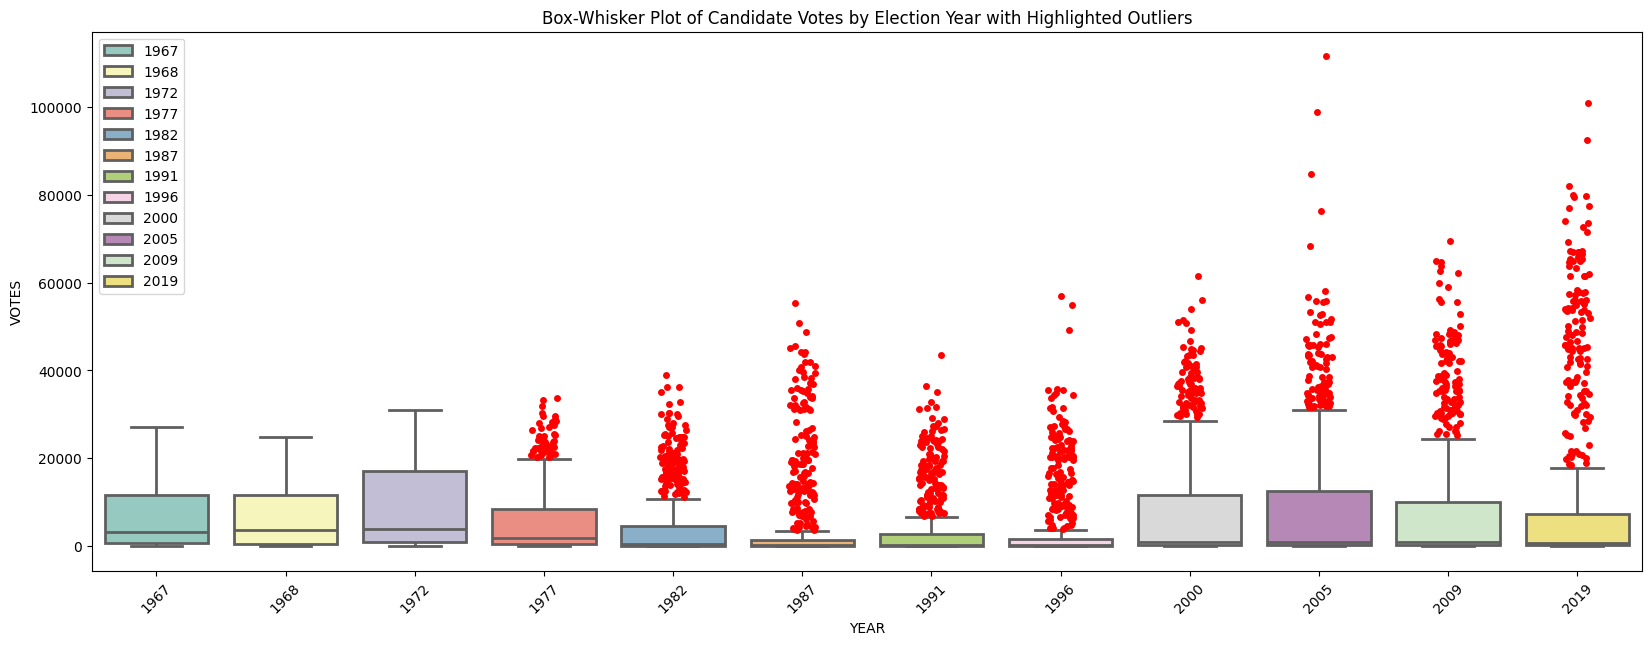

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

ac_data=complete_df.copy()
ac_data = ac_data.dropna(subset=['VOTES'])
ac_data = ac_data.drop_duplicates()

ac_data['Outlier'] = False

for year in ac_data['YEAR'].unique():
    year_data = ac_data[ac_data['YEAR'] == year]['VOTES']
    q1 = year_data.quantile(0.25)
    q3 = year_data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    ac_data.loc[(ac_data['YEAR'] == year) & ((ac_data['VOTES'] < lower_bound) | (ac_data['VOTES'] > upper_bound)), 'Outlier'] = True


plt.figure(figsize=(20, 7))
sns.boxplot(x='YEAR', y='VOTES', data=ac_data, hue='YEAR',palette="Set3", showfliers=False, linewidth=2)
sns.stripplot(x='YEAR', y='VOTES', data=ac_data[ac_data['Outlier']], color='red', size=5, jitter=True)
plt.title('Box-Whisker Plot of Candidate Votes by Election Year with Highlighted Outliers')
plt.xticks(rotation=45)

plt.savefig('outliers_box_plot.png', dpi=500)
plt.show()


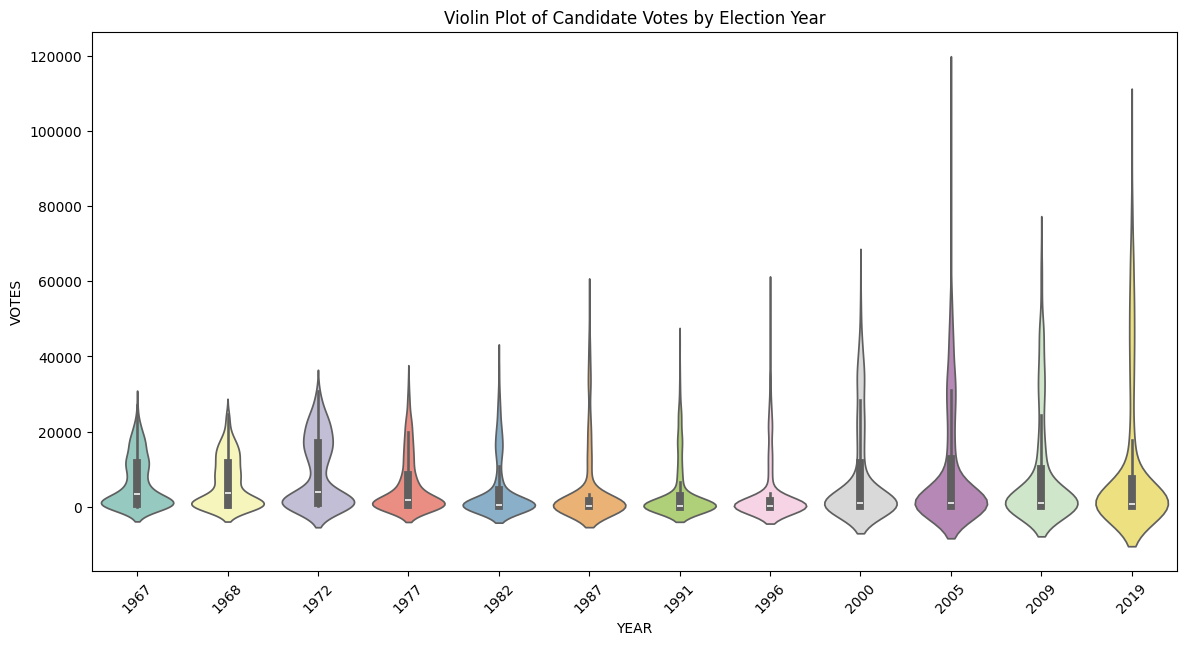

In [45]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='YEAR', y='VOTES', data=ac_data, hue='YEAR', palette="Set3", legend=False)
plt.title('Violin Plot of Candidate Votes by Election Year')
plt.xticks(rotation=45)

plt.savefig('outlier_violin_plot.png', dpi=300)
plt.show()

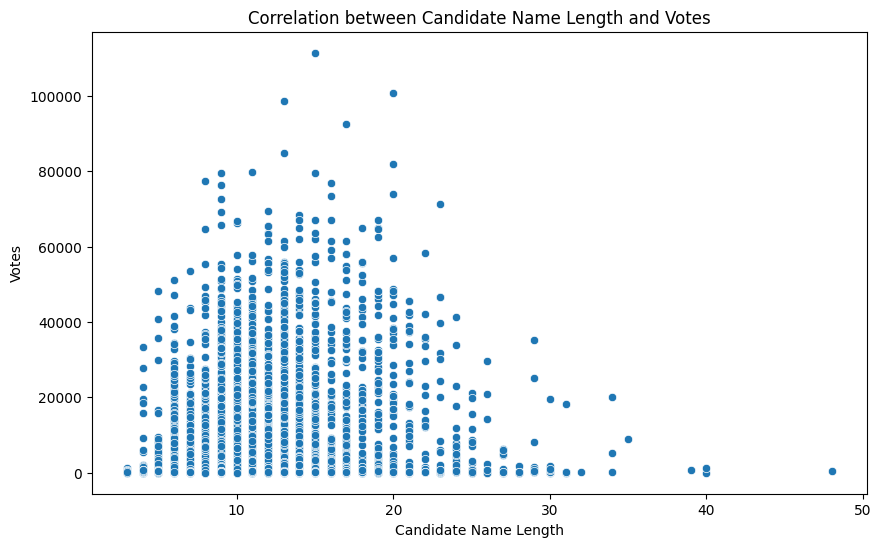

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ac_data is your DataFrame and it contains 'CANDIDATE' and 'VOTES' columns

# Remove rows with NaN/None/blank votes
ac_data = ac_data.dropna(subset=['VOTES'])

# Step 1: Extract the name part (remove the number and space at the beginning)
ac_data['CANDIDATE_NAME'] = ac_data['CANDIDATE'].apply(lambda x: ' '.join(x.split()[1:]))

# Step 2: Calculate the length of each candidate's name
ac_data['NAME_LENGTH'] = ac_data['CANDIDATE_NAME'].apply(len)
# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NAME_LENGTH', y='VOTES', data=ac_data)
plt.title('Correlation between Candidate Name Length and Votes')
plt.xlabel('Candidate Name Length')
plt.ylabel('Votes')
plt.savefig('coorelation.png', dpi=300)
plt.show()


In [40]:
ac_data.tail()

,Unnamed: 0,ST_NAME,YEAR,AC,CANDIDATE,SEX,AGE,CATEGORY,PARTY,VOTES,Outlier,CANDIDATE_NAME,NAME_LENGTH
7534,129709,HARYANA,2019,51 BARWALA,8 ANIL KUMAR SHARMA SATRODIA,M,42.0,GEN,SWARAJ,720.0,False,ANIL KUMAR SHARMA SATRODIA,26
7535,129710,HARYANA,2019,51 BARWALA,9 RAGHUVINDER KHOKHA,M,49.0,GEN,INLD,694.0,False,RAGHUVINDER KHOKHA,18
7536,129711,HARYANA,2019,51 BARWALA,10 NOTA,NOTA,NOTA,NOTA,NOTA,669.0,False,NOTA,4
7537,129712,HARYANA,2019,51 BARWALA,11 RAGHUVIR SINGH ADVOCATE,M,48.0,SC,IND,632.0,False,RAGHUVIR SINGH ADVOCATE,23
7538,129713,HARYANA,2019,51 BARWALA,12 VIJAY KUMAR,M,30.0,GEN,SHS,379.0,False,VIJAY KUMAR,11


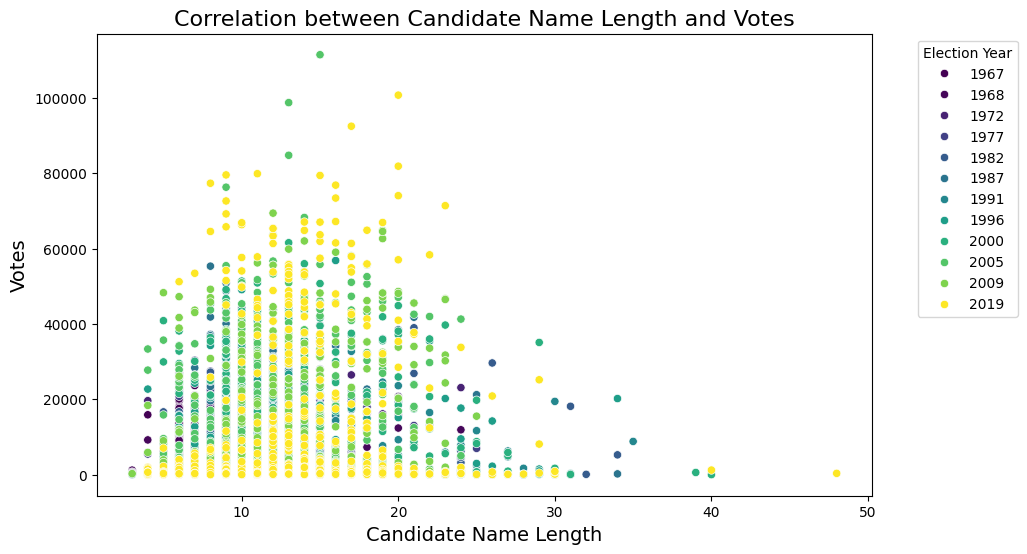

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming ac_data is your DataFrame and it contains 'CANDIDATE' and 'VOTES' columns

# Remove rows with NaN/None/blank votes
ac_data = ac_data.dropna(subset=['VOTES'])

# Step 1: Extract the name part (remove the number and space at the beginning)
ac_data['CANDIDATE_NAME'] = ac_data['CANDIDATE'].apply(lambda x: ' '.join(x.split()[1:]))

# Step 2: Calculate the length of each candidate's name
ac_data['NAME_LENGTH'] = ac_data['CANDIDATE_NAME'].apply(len)

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NAME_LENGTH', y='VOTES', data=ac_data, hue='YEAR', palette='viridis', legend='full')

# Add title and labels
plt.title('Correlation between Candidate Name Length and Votes', fontsize=16)
plt.xlabel('Candidate Name Length', fontsize=14)
plt.ylabel('Votes', fontsize=14)

# Add legend
plt.legend(title='Election Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig('name_length_vs_votes_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()
